In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

filepath = 'sample.tsv'
df = pd.read_csv(filepath, sep='\t')
sentences = df['Sentence']
target = df['RE_Type']

from sklearn.utils.multiclass import unique_labels
noRE_labels = [l for l in unique_labels(target.tolist()) if l!="NoRE"]

In [2]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, target, test_size=0.33, random_state=1000)
sentences_train

2829    Ubiquitination of human TPP1 also had no detec...
2028    In addition, expression of AGL15 in the phloem...
1145    During S phase the histone chaperones Asf1, CA...
1157    Finally, deletion of RAD17 results in increase...
2610    Yeast two-hybrid assays further revealed that ...
737     Our findings not only suggest a function of ea...
1934    The mRNA expression of glutathione peroxidase ...
3111    The genes HLA complex P5 (HCP5), spermatogenes...
792     The expression levels of 11b-HSD1, 11b-HSD2, C...
1277    Based on the reported zebrafish Ugt gene reper...
1865    RESULTS: We show that FAF1 contains a non-cano...
1559    At the same time basic therapy facilitated a s...
892     The IL-1b-induced p38 signaling pathway was fu...
1217    LY294002, an inhibitor of PI3k, abolished HGF-...
325     The c-FLIPL cleavage product p43FLIP promotes ...
121     We identified seven genes positively correlate...
2151    PURPOSE: To study the relationship of imprinte...
1182    We exa

In [3]:
vectorizer = TfidfVectorizer(min_df=0, lowercase=True, stop_words ='english')#
vectorizer.fit(sentences_train)
#vectorizer.vocabulary_ # determine vocabulary IDs
sentences

0       A brain-specific Grb2-associated regulator of ...
1       Grb2-associated regulator of Erk/MAPK1 (GAREM)...
2       Therefore, previously identified GAREM is name...
3       Here we characterized a new subtype of GAREM, ...
4       Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...
5       Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...
6       Furthermore, GAREM2 and Shp2 regulate Erk acti...
7       Furthermore, GAREM2 and Shp2 regulate Erk acti...
8       GAREM2 is expressed in some neuroblastoma cell...
9       Eventually, GAREM2 regulates Erk activation in...
10      GAREM2 also regulates insulin-like growth fact...
11      Although the structure and function of both GA...
12      Although the structure and function of both GA...
13      Although the structure and function of both GA...
14      Nuclear localization of GAREM1 might be contro...
15      Nuclear localization of GAREM1 might be contro...
16      Nuclear localization of GAREM1 might be contro...
17      The N-

In [4]:
len(vectorizer.vocabulary_)

3737

In [5]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [6]:
X_train # a very very sparse matrix

<2315x3737 sparse matrix of type '<class 'numpy.float64'>'
	with 43341 stored elements in Compressed Sparse Row format>

In [7]:
print(X_train)

  (0, 3560)	0.20387487316269157
  (0, 3468)	0.5040395243716366
  (0, 3435)	0.27607730244701656
  (0, 3398)	0.27607730244701656
  (0, 3394)	0.2646591961420146
  (0, 3255)	0.27607730244701656
  (0, 2724)	0.11899876145705772
  (0, 2627)	0.27607730244701656
  (0, 1866)	0.18814114431138262
  (0, 1778)	0.19113804034324441
  (0, 1613)	0.17636384988204407
  (0, 1139)	0.20496233891007606
  (0, 995)	0.27607730244701656
  (0, 857)	0.27607730244701656
  (0, 746)	0.1334815661766581
  (1, 3685)	0.2632737512313738
  (1, 3545)	0.22270018356143995
  (1, 3434)	0.31245511025480505
  (1, 2928)	0.2778436471704553
  (1, 2544)	0.31245511025480505
  (1, 2212)	0.23926312001788796
  (1, 1351)	0.2675776469081225
  (1, 1278)	0.0998754570285404
  (1, 1136)	0.31245511025480505
  (1, 227)	0.24952912028022078
  :	:
  (2313, 3009)	0.5094841390149157
  (2313, 1880)	0.25474206950745787
  (2313, 1721)	0.24138360159995556
  (2313, 1251)	0.2673438898793483
  (2313, 1076)	0.36845710375663765
  (2313, 589)	0.4203776803154231

In [8]:
X_train.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
vectorizer.fit(sentences) # fit all training set
vectorizer.vocabulary_ # determine vocabulary IDs

{'brain': 536,
 'specific': 3424,
 'grb2': 1606,
 'associated': 382,
 'regulator': 3063,
 'extracellular': 1383,
 'signal': 3352,
 'regulated': 3059,
 'kinase': 1991,
 'erk': 1309,
 'mitogen': 2284,
 'activated': 190,
 'protein': 2926,
 'mapk': 2156,
 'garem': 1523,
 'subtype': 3535,
 'garem2': 1525,
 'contributes': 853,
 'neurite': 2445,
 'outgrowth': 2580,
 'neuroblastoma': 2446,
 'cells': 669,
 'regulating': 3061,
 'signaling': 3353,
 'mapk1': 2157,
 'adaptor': 207,
 'molecule': 2316,
 'egf': 1222,
 'mediated': 2211,
 'pathway': 2659,
 'previously': 2859,
 'identified': 1762,
 'named': 2410,
 'garem1': 1524,
 'characterized': 694,
 'new': 2459,
 'specifically': 3425,
 'expressed': 1373,
 'mouse': 2335,
 'rat': 3001,
 'human': 1731,
 'tyrosines': 3810,
 'tyr': 3808,
 '102': 9,
 '429': 98,
 '551': 112,
 'phosphorylated': 2747,
 'stimulation': 3491,
 'necessary': 2427,
 'binding': 495,
 'furthermore': 1498,
 'shp2': 3343,
 'regulate': 3058,
 'activity': 198,
 'stimulated': 3488,
 'cell

In [10]:
X = vectorizer.transform(sentences)
Y = target
X
Y

0        Neutral_Regulation
1                      NoRE
2                      NoRE
3                      NoRE
4                   Binding
5              Modification
6        Neutral_Regulation
7        Neutral_Regulation
8                   Binding
9       Positive_Regulation
10                     NoRE
11                     NoRE
12                     NoRE
13                     NoRE
14                     NoRE
15                     NoRE
16                     NoRE
17                     NoRE
18              Association
19        Interaction_Agent
20            Translocation
21                     NoRE
22           Negative_Agent
23       Neutral_Regulation
24                     NoRE
25                     NoRE
26                     NoRE
27        Interaction_Agent
28      Positive_Regulation
29            Translocation
               ...         
3426                   NoRE
3427                   NoRE
3428                   NoRE
3429                   NoRE
3430                

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=1000)))
models.append(('SVM', SVC(kernel='linear')))

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score
results = []
names = []
def tenFoldCV(scoref):
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=1)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoref)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

def exclude_NoRE_FScore(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro', labels=noRE_labels)

from sklearn.metrics import make_scorer
scoring = make_scorer(exclude_NoRE_FScore)

tenFoldCV(scoring)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

LR: 0.138369 (0.020183)
SVM: 0.199058 (0.012054)


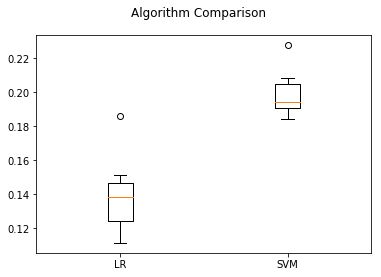

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# proprecciong

In [14]:
df#詳列 資訊

,PMID,Sentence_ID,Sentence,Gene1|Gene1_ID,Gene1_Index(start|end),Gene2|Gene2_ID,Gene2_Index(start|end),RE_Type
0,24003223,S1,A brain-specific Grb2-associated regulator of ...,Erk|5594,225|228,GAREM2|150946,147|153,Neutral_Regulation
1,24003223,S2,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,0|46,EGF|1950,77|80,NoRE
2,24003223,S5,"Therefore, previously identified GAREM is name...",GAREM|64762,34|39,GAREM1|64762,49|55,NoRE
3,24003223,S6,"Here we characterized a new subtype of GAREM, ...",GAREM|381126,40|45,GAREM2|242915,47|53,NoRE
4,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",Grb2|2885,128|132,GAREM2|150946,6|12,Binding
5,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",EGF|1950,79|82,GAREM2|150946,6|12,Modification
6,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,GAREM2|150946,13|19,Neutral_Regulation
7,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,Shp2|5781,24|28,Neutral_Regulation
8,24003223,S10,GAREM2 is expressed in some neuroblastoma cell...,Grb2|2885,102|106,GAREM2|150946,0|6,Binding
9,24003223,S11,"Eventually, GAREM2 regulates Erk activation in...",GAREM2|150946,12|18,Erk|5594,29|32,Positive_Regulation


In [15]:
df[['Sentence', 'Gene1_Index(start|end)', 'Gene2_Index(start|end)']] #取出 整行

,Sentence,Gene1_Index(start|end),Gene2_Index(start|end)
0,A brain-specific Grb2-associated regulator of ...,225|228,147|153
1,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,0|46,77|80
2,"Therefore, previously identified GAREM is name...",34|39,49|55
3,"Here we characterized a new subtype of GAREM, ...",40|45,47|53
4,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",128|132,6|12
5,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",79|82,6|12
6,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",38|41,13|19
7,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",38|41,24|28
8,GAREM2 is expressed in some neuroblastoma cell...,102|106,0|6
9,"Eventually, GAREM2 regulates Erk activation in...",12|18,29|32


In [16]:
df.loc[0] #取出橫的整列

PMID                                                               24003223
Sentence_ID                                                              S1
Sentence                  A brain-specific Grb2-associated regulator of ...
Gene1|Gene1_ID                                                     Erk|5594
Gene1_Index(start|end)                                              225|228
Gene2|Gene2_ID                                                GAREM2|150946
Gene2_Index(start|end)                                              147|153
RE_Type                                                  Neutral_Regulation
Name: 0, dtype: object

In [17]:
df.loc[0:2].Sentence

0    A brain-specific Grb2-associated regulator of ...
1    Grb2-associated regulator of Erk/MAPK1 (GAREM)...
2    Therefore, previously identified GAREM is name...
Name: Sentence, dtype: object

In [18]:
df.loc[0:10]['Gene1_Index(start|end)']

0     225|228
1        0|46
2       34|39
3       40|45
4     128|132
5       79|82
6       38|41
7       38|41
8     102|106
9       12|18
10        0|6
Name: Gene1_Index(start|end), dtype: object

In [19]:
def splitIndex(index):
    return index.split('|') 
splitIndex(df.loc[0]['Gene1_Index(start|end)'])

['225', '228']

In [20]:
print(df.loc[0].Sentence)
def Replace2Gene(start, end, text, symbol):#
    return text[0:int(start)] + symbol + text[int(end):]
Replace2Gene(225, 228, df.Sentence[0], "__GENE1__")

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.


'A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE1__ signaling.'

In [21]:
df['Gene2_Index(start|end)'][0]


'147|153'

In [22]:
print(df.Sentence[0])
Replace2Gene(147, 153, Replace2Gene(225, 228, df.Sentence[0], "__GENE1__"), "__GENE2__")


A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.


'A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, __GENE2__, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE1__ signaling.'

In [23]:
for i in range(len(sentences)):
    g1_bag=splitIndex(df.loc[i]['Gene1_Index(start|end)'])
    g1_sum=int(g1_bag[0])+int(g1_bag[1])
    g2_bag=splitIndex(df.loc[i]['Gene2_Index(start|end)'])
    g2_sum=int(g2_bag[0])+int(g2_bag[1])
    if(g2_sum>g1_sum):
        first=int(g1_bag[0])
        second=int(g1_bag[1])
        third=int(g2_bag[0])
        four=int(g1_bag[1])
        item="__GENE1__"
        item2="__GENE2__"
    else:
        first=int(g2_bag[0])
        second=int(g1_bag[1])
        third=int(g1_bag[0])
        four=int(g1_bag[1])
        item="__GENE1__"
        item2="__GENE2__"
        
    print(Replace2Gene(first, second, Replace2Gene(third, four, df.Sentence[0],item ), item2))
   # print(g2_sum)
   # print(g1_sum)
    #print(g1_bag)


A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, __GENE2__ENE1__ signaling.
__GENE2__extracellular signal-regulated __GENE1__extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated r__GENE2__tor of ext__GENE1__tor of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulat__GENE2__ e__GENE1__ extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brai__GENE2__NE1__AREM) subtype, GAREM2, contributes to neurite

A brain-specific Grb2-associated regul__GENE2__ of extracellular signal-regulated __GENE1__ of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regul__GENE2__ of extracellular signal-regulated kinase (Erk)/mitogen-activ__GENE1__ of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator o__GENE2__racell__GENE1__racellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator o__GENE2__racellular signal-regulated __GENE1__racellular signal-regulated kinase (Erk)/mitoge

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2__GENE2__ri__GENE1__ributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2__GENE2__ributes to n__GENE1__ributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contri__GENE2__ to n__GENE1__ to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific __GENE2__-associated regulator of extracellular s__GENE1__-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to 

A brain-specific Grb2-associated regulator of extracellular s__GENE2__
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activat__GENE2__
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GA__GENE2__
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GA__GENE2__
A brain-specific Grb2-associated regulator o__GENE2__acellular signal-regula__GENE1__acellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator o__GENE2__ENE1__o neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (E__GE

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MA__GENE2__(GAREM) su__GENE1__(GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MA__GENE2__(GAREM) subtype__GENE1__(GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MA__GENE2__(GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblas__GENE1__(GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MA__GENE2__(GAREM) 

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE2__gnaling.__GENE1__gnaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE2__gnaling.__GENE1__gnaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE2__gnaling.__GENE1__gnaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regula

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated prot__GENE2__ kinase__GENE1__ kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific G__GENE2__ENE1__ kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein __GENE2__e__GENE1__e (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific G__GENE2__E1__e (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific G__GENE2__ENE1__APK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associ

A brain-specific Grb2-assoc__GENE2__ regu__GENE1__ regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
__GENE2__in-specific Grb2__GENE1__in-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
__GENE2__in-specific Grb2-associate__GENE1__in-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-sp__GENE2__c Grb2__GENE1__c Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neuri

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth o__GENE2__lastoma cells by __GENE1__lastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulat__GENE2__f extracellul__GENE1__f extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulat__GENE2__f extracellular sig__GENE1__f extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellul__GENE2__ig__GENE1__ignal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) su__GENE2__e, GA__GENE1__e, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specifi__GENE2__b2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-acti__GENE1__b2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated k__GENE2__e (Er__GENE1__e (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated k__GENE2__e (Erk)/mitogen-activated protein kinas__GENE1__e (Erk)/mi

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mit__GENE2__activa__GENE1__activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Gr__GENE2__ssoci__GENE1__ssociated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Gr__GENE2__ssociated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GARE__GENE1__ssociated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associ__GENE2__ regulator of extracellular signal-regulated kinase (Erk)/mitog

A brain-specific Grb2-associ__GENE2__regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to n__GENE1__regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associ__GENE2__regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma__GENE1__regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to n__GENE2__te ou

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes__GENE2__eu__GENE1__eurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes__GENE2__eurite ou__GENE1__eurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes__GENE2__eurite outgrowth__GENE1__eurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes__GENE2__eurite outgrowth of neu__GENE1__eurite 

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neu__GENE2__stoma cel__GENE1__stoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neu__GENE2__stoma cells by re__GENE1__stoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neu__GENE2__stoma cells by regulating E__GENE1__stoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth 

A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to __GENE2__e __GENE1__e outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to __GENE2__e outgrowth __GENE1__e outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to __GENE2__e outgrowth of neuroblastoma cells by regulating Erk signaling.__GENE1__e outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes 

A brain-specific Grb2-associated regulator of extracel__GENE2__r signal-re__GENE1__r signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracel__GENE2__r signal-regulated kinase (Erk)/mitoge__GENE1__r signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular __GENE2__al-re__GENE1__al-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating Erk signaling.
A brain-specific Grb2-associated regulator of extracellular __GENE2__al-regulated kinase (Erk)/mitoge__GENE1__al-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) 

In [24]:
def Replace(row):
    return Replace2Gene(splitIndex(row['Gene1_Index(start|end)'])[0], 
                       splitIndex(row['Gene1_Index(start|end)'])[1], 
                       row.Sentence, "__GENE1__")
df['Replaced']=df.apply(Replace, axis=1)

In [25]:
df

,PMID,Sentence_ID,Sentence,Gene1|Gene1_ID,Gene1_Index(start|end),Gene2|Gene2_ID,Gene2_Index(start|end),RE_Type,Replaced
0,24003223,S1,A brain-specific Grb2-associated regulator of ...,Erk|5594,225|228,GAREM2|150946,147|153,Neutral_Regulation,A brain-specific Grb2-associated regulator of ...
1,24003223,S2,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,Grb2-associated regulator of Erk/MAPK1 (GAREM)...,0|46,EGF|1950,77|80,NoRE,__GENE1__ is an adaptor molecule in the EGF-me...
2,24003223,S5,"Therefore, previously identified GAREM is name...",GAREM|64762,34|39,GAREM1|64762,49|55,NoRE,"Therefore, previously identified G__GENE1__is ..."
3,24003223,S6,"Here we characterized a new subtype of GAREM, ...",GAREM|381126,40|45,GAREM2|242915,47|53,NoRE,Here we characterized a new subtype of G__GENE...
4,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",Grb2|2885,128|132,GAREM2|150946,6|12,Binding,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ..."
5,24003223,S7,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ...",EGF|1950,79|82,GAREM2|150946,6|12,Modification,"Three GAREM2 tyrosines (Tyr-102, Tyr-429, and ..."
6,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,GAREM2|150946,13|19,Neutral_Regulation,"Furthermore, GAREM2 and Shp2 regulate __GENE1_..."
7,24003223,S8,"Furthermore, GAREM2 and Shp2 regulate Erk acti...",Erk|5594,38|41,Shp2|5781,24|28,Neutral_Regulation,"Furthermore, GAREM2 and Shp2 regulate __GENE1_..."
8,24003223,S10,GAREM2 is expressed in some neuroblastoma cell...,Grb2|2885,102|106,GAREM2|150946,0|6,Binding,GAREM2 is expressed in some neuroblastoma cell...
9,24003223,S11,"Eventually, GAREM2 regulates Erk activation in...",GAREM2|150946,12|18,Erk|5594,29|32,Positive_Regulation,"Eventually, __GENE1__ regulates Erk activation..."


In [26]:
df['Replaced'][0]

'A brain-specific Grb2-associated regulator of extracellular signal-regulated kinase (Erk)/mitogen-activated protein kinase (MAPK) (GAREM) subtype, GAREM2, contributes to neurite outgrowth of neuroblastoma cells by regulating __GENE1__ signaling.'

In [27]:
sentences = df['Replaced']
vectorizer = TfidfVectorizer(min_df=0, lowercase=True, stop_words ='english')
vectorizer.fit(sentences)
X = vectorizer.transform(sentences)
Y = target

In [28]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=1000)))
models.append(('SVM', SVC(kernel='linear')))

In [29]:
tenFoldCV(scoring)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

LR: 0.153305 (0.020840)
SVM: 0.206191 (0.013696)


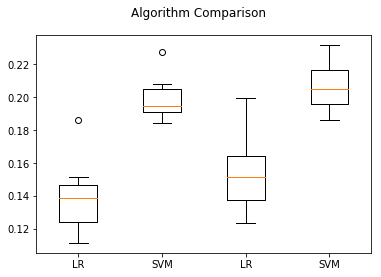

In [30]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# nngram

In [32]:
vectorizer = CountVectorizer(min_df=0, lowercase=False,ngram_range=(1,3))#讀三句
vectorizer.fit(sentences)
vectorizer.vocabulary_# determine vocabulary IDs

{'brain': 16174,
 'specific': 35495,
 'Grb2': 4182,
 'associated': 15290,
 'regulator': 33794,
 'of': 29008,
 'extracellular': 21006,
 'signal': 35144,
 'regulated': 33649,
 'kinase': 25938,
 'Erk': 3446,
 'mitogen': 27718,
 'activated': 12112,
 'protein': 32681,
 'MAPK': 5579,
 'GAREM': 3880,
 'subtype': 36090,
 'GAREM2': 3892,
 'contributes': 18294,
 'to': 38960,
 'neurite': 28468,
 'outgrowth': 30965,
 'neuroblastoma': 28474,
 'cells': 17204,
 'by': 16334,
 'regulating': 33733,
 '__GENE1__': 10805,
 'signaling': 35151,
 'brain specific': 16185,
 'specific Grb2': 35498,
 'Grb2 associated': 4186,
 'associated regulator': 15316,
 'regulator of': 33797,
 'of extracellular': 29970,
 'extracellular signal': 21009,
 'signal regulated': 35147,
 'regulated kinase': 33675,
 'kinase Erk': 25949,
 'Erk mitogen': 3449,
 'mitogen activated': 27719,
 'activated protein': 12136,
 'protein kinase': 32844,
 'kinase MAPK': 25955,
 'MAPK GAREM': 5580,
 'GAREM subtype': 3881,
 'subtype GAREM2': 36091,
 

In [ ]:
X=vectorizer.transform(sentences)#要跑宇宙世界無敵超級超級無敵霹靂 久 耐心等待
Y=target
models.append(('LR',LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=1000)))
models.append(('SVM',SVC(kernel='linear')))
tenFoldCV('f1_micro')
scoring=make_scorer(exclude_NoRE_FScore)
tenFoldCV(scoring)